In [1]:
import cv2

# Load the cascade
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')

In [2]:
face_cascade

<CascadeClassifier 0x7f7ce84bee30>

# Face Detection

In [3]:
# Read the input image
img1 = cv2.imread('data/people.png')
img = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4,minSize = (30,30))

In [4]:
faces

array([[258,  71,  73,  73],
       [358, 107,  56,  56],
       [144,  90,  54,  54],
       [612,  91,  54,  54],
       [474,  84,  57,  57]], dtype=int32)

In [5]:
len(faces)

5

In [6]:
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)

In [7]:
# Show Image
cv2.namedWindow('People', cv2.WINDOW_AUTOSIZE)
cv2.imshow('People', img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

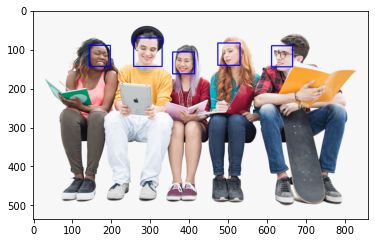

In [9]:
plt.imshow(img)

# Detecting Eyes

In [10]:
eye_cascade = cv2.CascadeClassifier('data/haarcascade_eye.xml')

In [11]:
img1 = cv2.imread('data/eye.jpg')
img = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 10,minSize = (30,30))
# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    roi_gray = gray[y:y+h, x:x+w] #cropiing the face
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray,minSize=(1,1)) #checking for eye within the face
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-11-41fa6ca178ee>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [12]:
# Show Image
cv2.namedWindow('People', cv2.WINDOW_AUTOSIZE)
cv2.imshow('People', img)
cv2.waitKey(8000)
cv2.destroyAllWindows()

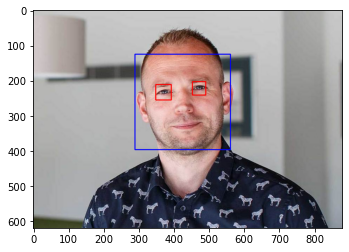

In [13]:
plt.imshow(img)

# Detecting Eyes from Video

In [14]:
video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        #cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break
# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

## Face Detection from webcam or Video Feed

In [15]:
video_capture = cv2.VideoCapture('data/dk.mp4') #To Read video 0 for webcam else you can give the video path

In [16]:
video_capture

<VideoCapture 0x7f7cb9f1b390>

In [17]:
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        #cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
        

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break
# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()